# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt  
from yellowbrick.cluster import KElbowVisualizer  
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN  
from sklearn.metrics import silhouette_score 
from sklearn.feature_selection import SelectKBest, mutual_info_regression, chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import numpy as np


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
gk_df = pd.read_csv('data/garisKemiskinan.csv')
minUpah_df = pd.read_csv('data/minUpah.csv')
pengeluaran_df = pd.read_csv('data/pengeluaran.csv')
avgUpah_df = pd.read_csv('data/rataRataUpah.csv')
gk_df.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


In [3]:
minUpah_df.head()

,provinsi,tahun,ump
0,ACEH,2002,330000.0
1,ACEH,2003,425000.0
2,ACEH,2004,550000.0
3,ACEH,2005,620000.0
4,ACEH,2006,820000.0


In [4]:
pengeluaran_df.head()

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


In [5]:
avgUpah_df.head()

,provinsi,tahun,upah
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
gk_df.info()
gk_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


,tahun,gk
count,5460.000000,5261.000000
mean,2018.115385,303904.185516
std,2.577159,158176.024903
min,2013.000000,48561.000000
25%,2016.000000,144674.000000
50%,2018.000000,313294.000000
75%,2020.000000,410188.000000
max,2022.000000,872843.000000


In [7]:
gk_df.isnull().sum()

provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

In [8]:
minUpah_df.info()
minUpah_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  735 non-null    object 
 1   tahun     735 non-null    int64  
 2   ump       711 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.4+ KB


,tahun,ump
count,735.000000,7.110000e+02
mean,2012.000000,1.402290e+06
std,6.059424,8.762622e+05
min,2002.000000,2.450000e+05
25%,2007.000000,6.639865e+05
50%,2012.000000,1.125207e+06
75%,2017.000000,2.074002e+06
max,2022.000000,4.641854e+06


In [9]:
minUpah_df.isnull().sum()

provinsi     0
tahun        0
ump         24
dtype: int64

In [10]:
pengeluaran_df.info()
pengeluaran_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB


,tahun,peng
count,4620.000000,4.512000e+03
mean,2015.045455,6.012012e+05
std,4.416124,3.524052e+05
min,2007.000000,5.921600e+04
25%,2011.750000,3.476272e+05
50%,2015.000000,5.206945e+05
75%,2019.000000,7.577325e+05
max,2022.000000,2.525347e+06


In [11]:
pengeluaran_df.isnull().sum()

provinsi      0
daerah        0
jenis         0
tahun         0
peng        108
dtype: int64

In [12]:
avgUpah_df.info()
avgUpah_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provinsi  280 non-null    object
 1   tahun     280 non-null    int64 
 2   upah      280 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB


,tahun,upah
count,280.00000,280.000000
mean,2018.50000,16621.010714
std,2.29539,4371.803056
min,2015.00000,8525.000000
25%,2016.75000,13468.750000
50%,2018.50000,15845.000000
75%,2020.25000,18634.750000
max,2022.00000,32685.000000


In [13]:
avgUpah_df.isnull().sum()

provinsi    0
tahun       0
upah        0
dtype: int64

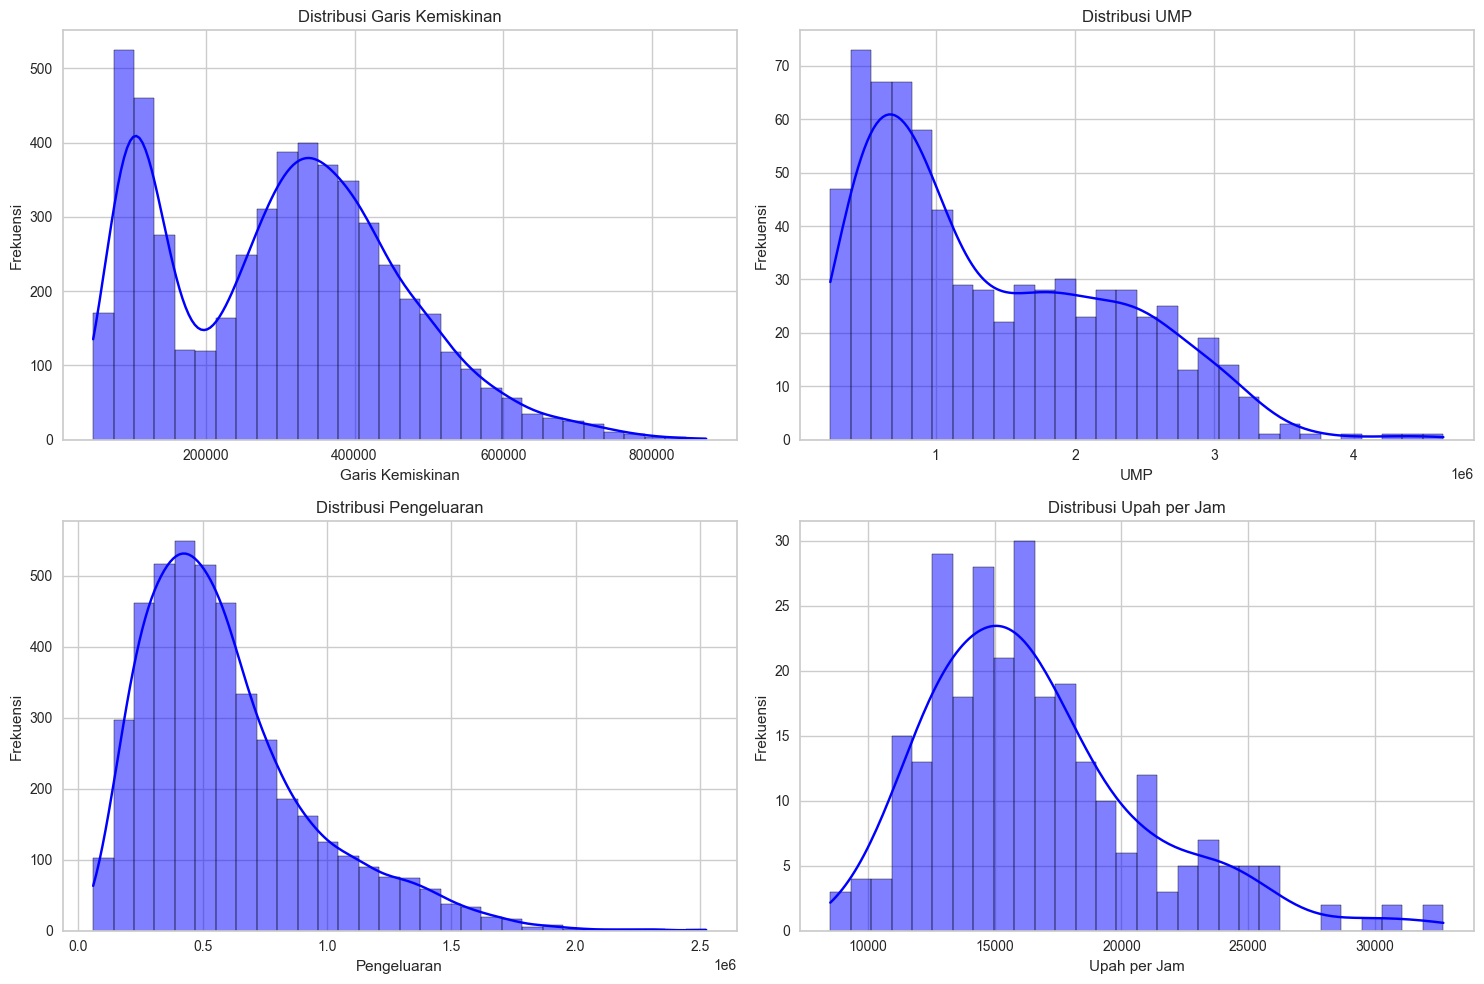

In [14]:
#Distribusi Data
numeric_cols = {'Garis Kemiskinan': gk_df['gk'], 'UMP': minUpah_df['ump'], 'Pengeluaran': pengeluaran_df['peng'], 'Upah per Jam': avgUpah_df['upah']}
plt.figure(figsize=(15, 10))

for i, (label, data) in enumerate(numeric_cols.items(), 1):
    plt.subplot(2, 2, i)
    sns.histplot(data, kde=True, bins=30, color='blue')
    plt.title(f"Distribusi {label}")
    plt.xlabel(label)
    plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

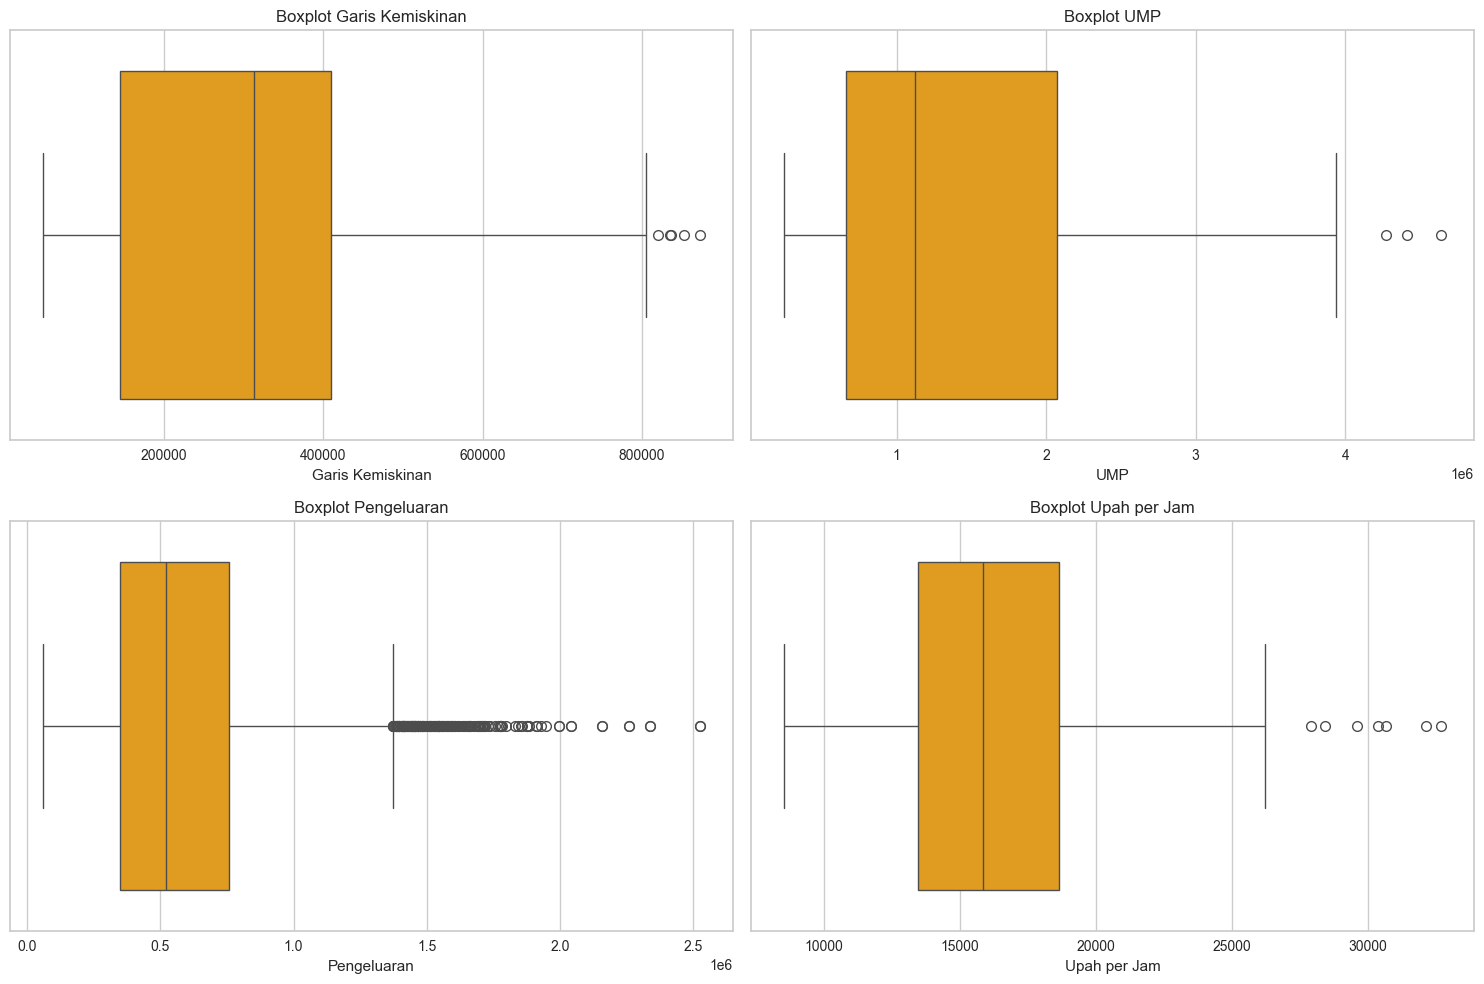

In [15]:
#Outliers
plt.figure(figsize=(15, 10))

for i, (label, data) in enumerate(numeric_cols.items(), 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data, color='orange')
    plt.title(f"Boxplot {label}")
    plt.xlabel(label)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [16]:
# mengisi nilai gk yang hilang dengan mean untuk kolom numerik
gk_df['gk'] = gk_df['gk'].fillna(gk_df['gk'].mean())
gk_df.isnull().sum()

provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64

In [17]:
# mengisi nilai ump yang hilang dengan mean untuk kolom numerik
minUpah_df['ump'] = minUpah_df['ump'].fillna(minUpah_df['ump'].mean())
gk_df.isnull().sum()

provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64

In [18]:
# mengisi nilai peng yang hilang dengan mean untuk kolom numerik
pengeluaran_df['peng'] = pengeluaran_df['peng'].fillna(pengeluaran_df['peng'].mean())
pengeluaran_df.isnull().sum()

provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64

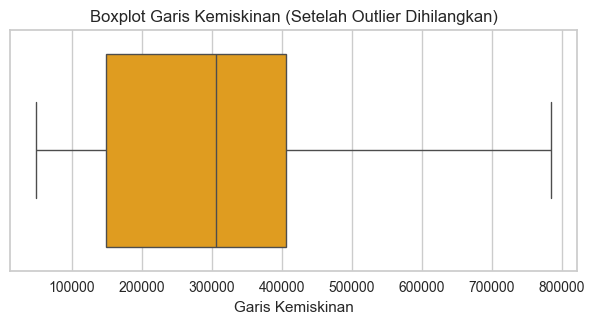

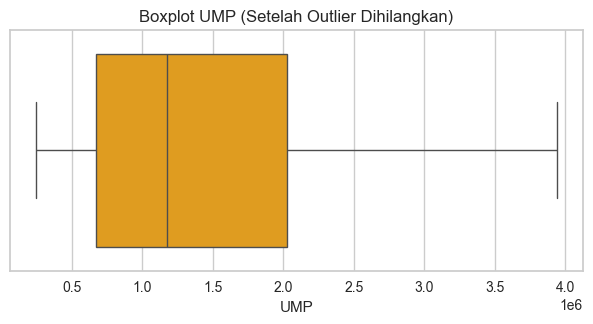

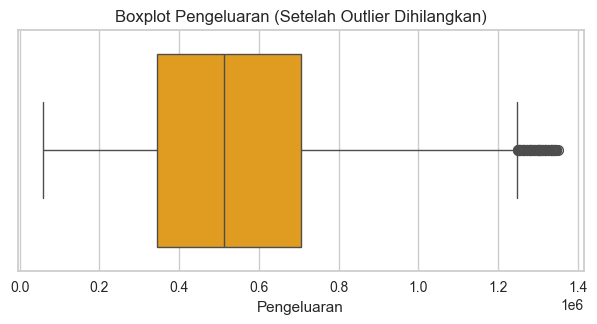

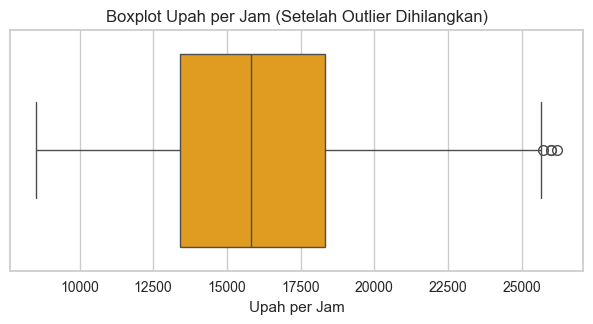

In [19]:
#Data Cleaning (Outliers)
def remove_outliers(df, numeric_cols):
    plt.figure(figsize=(12, 6))
    for i, (label, column) in enumerate(numeric_cols.items(), 1):
        Q1, Q3 = df[column.name].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        df = df[(df[column.name] >= Q1 - 1.5 * IQR) & (df[column.name] <= Q3 + 1.5 * IQR)]
        plt.subplot(2, 2, i)
        sns.boxplot(x=df[column.name], color='orange')
        plt.title(f"Boxplot {label} (Setelah Outlier Dihilangkan)")
        plt.xlabel(label)
    plt.tight_layout()
    plt.show()
    return df

gk_clean = remove_outliers(gk_df, {'Garis Kemiskinan': gk_df['gk']})
ump_clean = remove_outliers(minUpah_df, {'UMP': minUpah_df['ump']})
peng_clean = remove_outliers(pengeluaran_df, {'Pengeluaran': pengeluaran_df['peng']})
avg_clean = remove_outliers(avgUpah_df, {'Upah per Jam': avgUpah_df['upah']})

In [20]:
merged_df = avg_clean.merge(minUpah_df, on=['tahun', 'provinsi'], how='left')
merged_df = merged_df.merge(gk_clean, on=['tahun', 'provinsi'], how='left')
merged_df = merged_df.merge(pengeluaran_df, on=['tahun', 'provinsi', 'daerah', 'jenis'], how='left')
merged_df.sample(20)

,provinsi,tahun,upah,ump,jenis,daerah,periode,gk,peng
2162,BANTEN,2018,20565,2099385.0,NONMAKANAN,PERDESAAN,MARET,96862.0,344889.0
3451,SULAWESI UTARA,2018,16954,2824286.0,MAKANAN,PERDESAANPERKOTAAN,MARET,265096.0,560514.0
1729,JAWA TENGAH,2018,11417,1486065.0,NONMAKANAN,PERKOTAAN,SEPTEMBER,99910.0,568887.0
1926,DI YOGYAKARTA,2021,15098,2215000.0,NONMAKANAN,PERKOTAAN,MARET,140801.0,958089.0
2566,NUSA TENGGARA TIMUR,2016,12868,1425000.0,TOTAL,PERDESAANPERKOTAAN,MARET,322947.0,576627.0
2134,BANTEN,2016,21033,1784000.0,TOTAL,PERDESAANPERKOTAAN,MARET,367949.0,1135256.0
1147,LAMPUNG,2022,13218,2440486.0,TOTAL,PERKOTAAN,SEPTEMBER,595992.0,1319283.0
2573,NUSA TENGGARA TIMUR,2017,12281,1525000.0,MAKANAN,PERDESAANPERKOTAAN,SEPTEMBER,273325.0,399251.0
1935,DI YOGYAKARTA,2021,15098,2215000.0,TOTAL,PERDESAAN,SEPTEMBER,438412.0,905420.0
3221,KALIMANTAN TIMUR,2021,23943,2903144.0,MAKANAN,PERDESAANPERKOTAAN,SEPTEMBER,495785.0,736465.0


In [21]:
merged_df.isnull().sum()

provinsi    0
tahun       0
upah        0
ump         0
jenis       0
daerah      0
periode     0
gk          0
peng        0
dtype: int64

In [22]:
merged_df.describe(include='all')

,provinsi,tahun,upah,ump,jenis,daerah,periode,gk,peng
count,4905,4905.000000,4905.000000,4.905000e+03,4905,4905,4905,4905.000000,4.905000e+03
unique,35,NaN,NaN,NaN,3,3,2,NaN,NaN
top,ACEH,NaN,NaN,NaN,MAKANAN,PERKOTAAN,MARET,NaN,NaN
freq,144,NaN,NaN,NaN,1638,1635,2454,NaN,NaN
mean,NaN,2018.436901,16266.736799,2.281179e+06,NaN,NaN,NaN,299732.824172,7.482685e+05
std,NaN,2.287312,3819.671128,5.652118e+05,NaN,NaN,NaN,157828.127475,3.414508e+05
min,NaN,2015.000000,8525.000000,9.100000e+05,NaN,NaN,NaN,48561.000000,1.760280e+05
25%,NaN,2016.000000,13396.000000,1.875000e+06,NaN,NaN,NaN,137419.000000,4.984640e+05
50%,NaN,2018.000000,15818.000000,2.258000e+06,NaN,NaN,NaN,311845.000000,6.497160e+05
75%,NaN,2020.000000,18314.000000,2.672371e+06,NaN,NaN,NaN,409193.000000,9.291350e+05


In [23]:

#Data Selection
features = ['ump', 'gk', 'upah', 'peng']
selected_data = merged_df[features]

#Data Transformation
scaler = MinMaxScaler()
X = scaler.fit_transform(selected_data)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### K-Means Clustering

In [24]:
# Inisialisasi dan melatih model KMeans dalam jumlah cluster = 2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Mendapatkan label Cluster
labels = kmeans.labels_      

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### Elbow Method

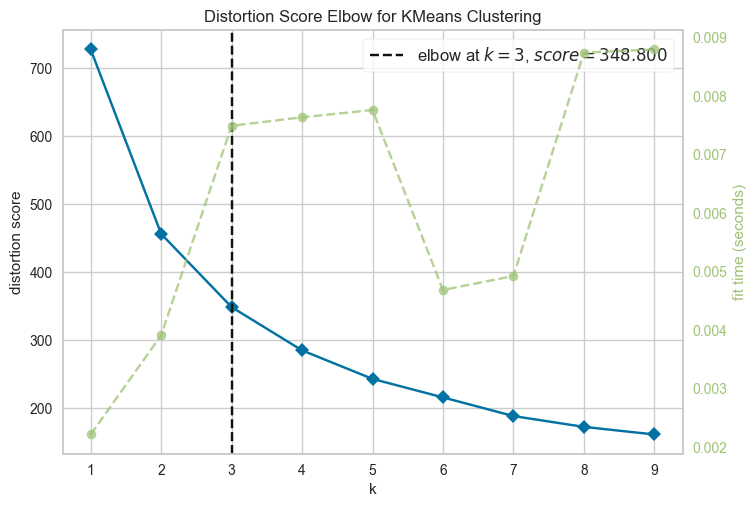

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# --------------Elbow Method-------------

# # Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

### Silhoutte Score

In [27]:
# Setelah elbow method
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Mendapatkan label Cluster
labels = kmeans.labels_

kmeans = KMeans(n_clusters=3, random_state=42)
silhouette_score(X, kmeans.fit_predict(X))

np.float64(0.3128387711423574)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

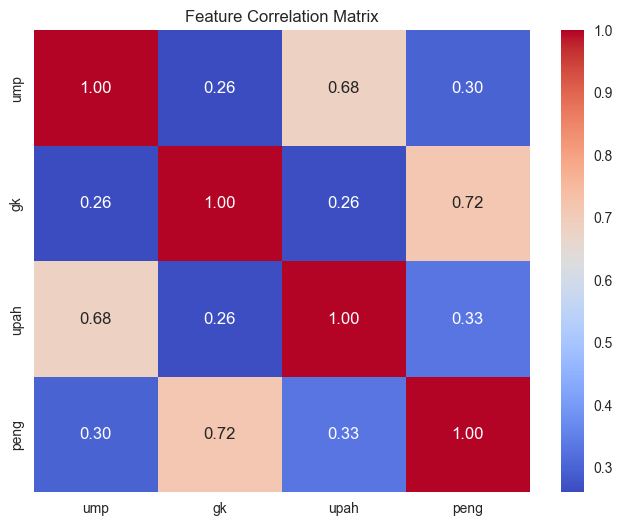

In [28]:
# Hitung matriks korelasi
corr_matrix = selected_data.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [29]:
filter_selector = SelectKBest(score_func=chi2, k=2)  # Memilih 2 fitur terbaik
X_selected_filter = filter_selector.fit_transform(X, labels)
selected_features_filter = selected_data.columns[filter_selector.get_support()]
print("Fitur yang dipilih dengan Filter Methods:", selected_features_filter)

Fitur yang dipilih dengan Filter Methods: Index(['gk', 'peng'], dtype='object')


In [30]:
# Gunakan RandomForest untuk menentukan fitur yang paling penting
model = RandomForestClassifier(n_estimators=100, random_state=42)

# RFE untuk memilih 2 fitur terbaik
selector_feature = RFE(model, n_features_to_select=2)
X_selected_RFE = selector_feature.fit_transform(X, labels)  # Gunakan labels hasil clustering

# Fitur yang dipilih
selected_features_RFE = selected_data.columns[selector_feature.support_]
print("Fitur yang dipilih:", selected_features_RFE)


Fitur yang dipilih: Index(['gk', 'upah'], dtype='object')


In [31]:
# Model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X, labels)

# Dapatkan pentingnya fitur
feature_importance = pd.Series(model.feature_importances_, index=selected_data.columns)

# Urutkan dari yang paling penting
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)


upah    0.373192
gk      0.268969
peng    0.220724
ump     0.137115
dtype: float64


### Pemodelan ulang dan evaluasi silhouette score setelah feature selection

In [32]:
kmeans_filter = KMeans(n_clusters=3, random_state=0)
kmeans_filter.fit(X_selected_filter)

# Mendapatkan label Cluster
labels_filter = kmeans.labels_

kmeans = KMeans(n_clusters=3, random_state=42)
silhouette_score(X_selected_filter, kmeans.fit_predict(X_selected_filter))

np.float64(0.4882947766064386)

In [33]:
kmeans_rfe = KMeans(n_clusters=3, random_state=0)
kmeans_rfe.fit(X_selected_RFE)

# Mendapatkan label Cluster
labels_rfe = kmeans.labels_

kmeans = KMeans(n_clusters=3, random_state=42)
silhouette_score(X_selected_RFE, kmeans.fit_predict(X_selected_RFE))

np.float64(0.40436939789237336)

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

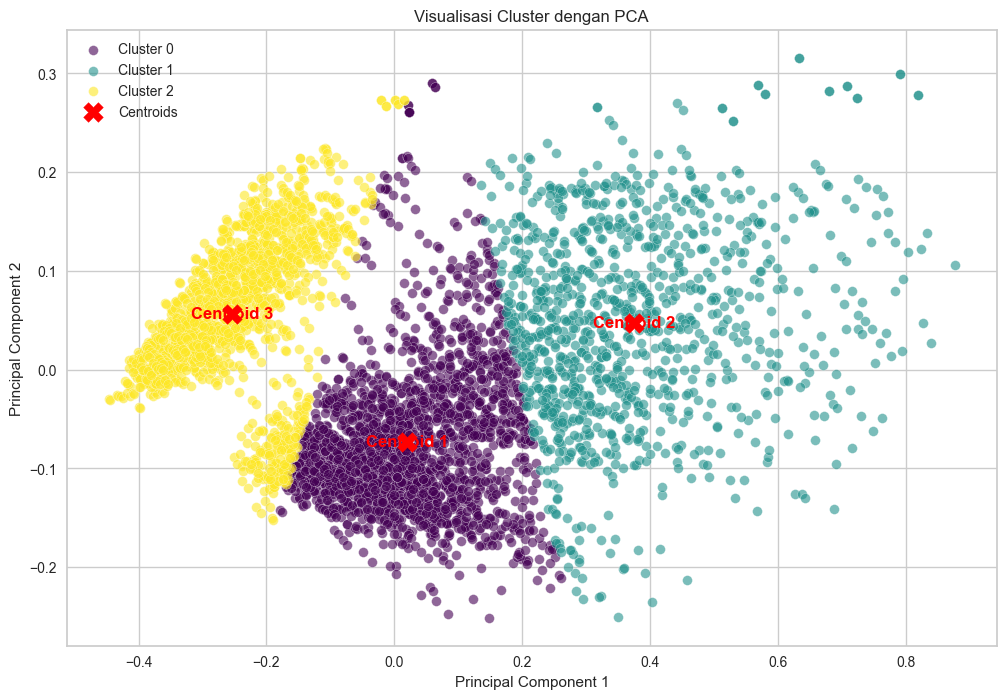

In [ ]:
# Mengubah data menjadi 2 dimensi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected_filter)  # Gunakan dataset yang telah digunakan dalam clustering

# Ambil hasil label clustering
labels = kmeans_filter.labels_
centroids_pca = pca.transform(kmeans_filter.cluster_centers_)  # Transformasi centroid ke PCA space

# Warna untuk setiap cluster
unique_labels = np.unique(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))  # Ambil warna dari viridis colormap

plt.figure(figsize=(12, 8))

# Plot setiap cluster dengan warna berbeda
for label, color in zip(unique_labels, colors):
    plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], 
                color=color, label=f'Cluster {label}', alpha=0.6, edgecolors='w', s=50)

# Plot centroid setelah transformasi PCA
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker="X", label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids_pca):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center', fontweight='bold')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)  # Tambahkan grid untuk memperjelas pemisahan

plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [35]:
# Masukkan label cluster ke dalam DataFrame asli
df_normalized = pd.DataFrame(X_selected_filter, columns=selected_features_filter)
df_normalized['Cluster'] = labels_filter


# Cek hasil
df_normalized.head()


,gk,peng,Cluster
0,0.332872,0.146624,0
1,0.344321,0.146624,0
2,0.338008,0.110656,0
3,0.350579,0.110656,0
4,0.336551,0.120867,0


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [36]:
# Fit ulang MinMaxScaler hanya pada fitur yang dipilih
scaler_selected = MinMaxScaler()
scaler_selected.fit(selected_data[selected_features_filter])  # Fit hanya pada fitur hasil seleksi

# Inverse transform hanya pada fitur yang dipilih
X_inverse_selected = scaler_selected.inverse_transform(X_selected_filter)


# Buat dataframe dari hasil inverse transform
df_clustered = pd.DataFrame(X_inverse_selected, columns=selected_features_filter)

# Tambahkan label cluster
df_clustered['Cluster'] = labels_filter

# Gabungkan dengan dataframe asli (hanya menambahkan cluster)
df_final = pd.concat([merged_df, df_clustered[['Cluster']]], axis=1)

# Cek hasil
df_final.sample(20)


,provinsi,tahun,upah,ump,jenis,daerah,periode,gk,peng,Cluster
4624,PAPUA BARAT,2019,22987,2934500.0,NONMAKANAN,PERKOTAAN,SEPTEMBER,169463.0,872356.0,2
2562,NUSA TENGGARA TIMUR,2016,12868,1425000.0,TOTAL,PERKOTAAN,MARET,386139.0,953114.0,0
3689,SULAWESI SELATAN,2015,12560,2000000.0,NONMAKANAN,PERDESAAN,MARET,49612.0,275628.0,0
4083,GORONTALO,2021,14613,4416186.0,NONMAKANAN,PERKOTAAN,MARET,97496.0,798884.0,2
2904,KALIMANTAN TENGAH,2019,18090,2663435.0,TOTAL,PERKOTAAN,MARET,418029.0,1466063.0,1
1667,JAWA BARAT,2022,19038,1841487.0,TOTAL,PERDESAANPERKOTAAN,SEPTEMBER,480350.0,1437394.0,1
1297,KEP. RIAU,2015,18863,1954000.0,NONMAKANAN,PERKOTAAN,SEPTEMBER,166916.0,809066.0,2
553,RIAU,2021,19144,2888564.0,TOTAL,PERKOTAAN,SEPTEMBER,618552.0,1582714.0,1
1870,DI YOGYAKARTA,2018,12554,1454154.0,MAKANAN,PERDESAANPERKOTAAN,MARET,292472.0,529012.0,0
3286,KALIMANTAN UTARA,2016,17547,2175340.0,TOTAL,PERDESAANPERKOTAAN,MARET,513614.0,1157774.0,1


In [37]:
aggregated = df_clustered.groupby('Cluster').agg(['mean', 'median', 'min', 'max', 'std'])
print(aggregated)

                    gk                                               \
                  mean    median       min       max            std   
Cluster                                                               
0        224501.511149  250695.5   48561.0  455543.0  113362.383964   
1        493021.047502  480812.0  281676.0  784988.0   90653.289592   
2        254935.857667  259794.5   59712.0  535410.0  123623.019588   

                 peng                                                 
                 mean     median       min        max            std  
Cluster                                                               
0        5.603041e+05   525970.0  176028.0  1302004.0  187291.454134  
1        1.208320e+06  1187658.0  523227.0  2156112.0  286850.396363  
2        6.570042e+05   637081.0  218261.0  1278663.0  166660.619064  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [38]:
# mendapatkan jumlah cluster optimal
k=3

# Mendapatkan label Cluster
labels_filter = kmeans_filter.labels_

# Fungsi untuk analisis karakteristik cluster
def analyze_cluster(X_inverse_selected, labels_filter, k, feature_names): 
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Ambil data untuk cluster tertentu
        cluster_data = X_inverse_selected[labels_filter == cluster_id]

        # Hitung rata-rata hanya untuk fitur yang terpilih
        means = cluster_data.mean(axis=0)

        print(f"\nCluster {cluster_id}")
        for i, feature in enumerate(feature_names):
            print(f"Rata-rata {feature}: {means[i]:.2f}")

# Analisis karakteristik setiap cluster
analyze_cluster(X_inverse_selected, labels_filter, k, selected_features_filter)
        

Analisis Karakteristik Setiap Cluster:

Cluster 0
Rata-rata gk: 343319.68
Rata-rata peng: 655910.88

Cluster 1
Rata-rata gk: 501167.42
Rata-rata peng: 1266563.11

Cluster 2
Rata-rata gk: 124542.82
Rata-rata peng: 538948.62


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Garis Kemiskinan:** Rp343,319.68
- **Rata-rata Pengeluaran** Rp655,910.88
- **Analisis:** Cluster ini memiliki garis kemiskinan cukup rendah, yang menunjukkan bahwa kelompok cluster dengan standar garis kemiskinan terbilang kecil. namun pengeluaran lebih tinggi yang berarti mereka memiliki kondisi ekonomi yang labih baik dan berada dalam kategori rentan miskin atau ekonomi menengah kebawah.

## Cluster 1:
- **Rata-rata Garis Kemiskinan:** Rp501,167.42
- **Rata-rata Pengeluaran** Rp1,266,563.11
- **Analisis:** Cluster ini memiliki garis kemiskinan tertinggi dan pengeluaran terbesar. kelompok ini  termasuk kelas menengah ke atas dengan standar hidup lebih tinggi. Bisa jadi mereka memiliki pekerjaan tetap, akses ke fasilitas kesehatan dan pendidikan yang lebih baik, dan cenderung tidak rentan terhadap kemiskinan

## Cluster 2:
- **Rata-rata Garis Kemiskinan:** Rp124,542.82
- **Rata-rata Pengeluaran** Rp538,948.62
- **Analisis:** Cluster ini memiliki garis kemiskinan terendah, yang bererti mereka hidup dalam kondisi ekonomi yang lebih sulit. dengan pengeluaran yang juga rendah, menunjukkan daya beli yang terbatas. kelompok ini dapat dikategorikan kelompok ekonomi bawah atau miskin

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [39]:
label_mapping = {
    0: "Rentan Miskin",
    1: "Sejahtera",
    2: "Miskin"
}

df_final['Cluster'] = df_final['Cluster'].map(label_mapping)

df_final.sample(10)

,provinsi,tahun,upah,ump,jenis,daerah,periode,gk,peng,Cluster
889,BENGKULU,2016,13471,1605000.0,NONMAKANAN,PERKOTAAN,SEPTEMBER,122478.0,695404.0,Rentan Miskin
2801,KALIMANTAN BARAT,2021,16127,1868777.0,TOTAL,PERDESAANPERKOTAAN,SEPTEMBER,505227.0,1163058.0,Sejahtera
2883,KALIMANTAN TENGAH,2018,17489,2421305.0,NONMAKANAN,PERDESAAN,SEPTEMBER,83686.0,489769.0,Miskin
163,SUMATERA UTARA,2016,11646,1811875.0,MAKANAN,PERKOTAAN,SEPTEMBER,302027.0,493141.0,Rentan Miskin
2951,KALIMANTAN TENGAH,2022,19795,2922516.0,MAKANAN,PERDESAANPERKOTAAN,SEPTEMBER,453342.0,762633.0,Miskin
4630,PAPUA BARAT,2019,22987,2934500.0,TOTAL,PERKOTAAN,SEPTEMBER,618279.0,1607055.0,Sejahtera
3480,SULAWESI UTARA,2019,18350,3051076.0,TOTAL,PERDESAAN,SEPTEMBER,381883.0,985771.0,Sejahtera
1964,JAWA TIMUR,2015,9214,1000000.0,NONMAKANAN,PERDESAAN,MARET,74839.0,306017.0,Rentan Miskin
1645,JAWA BARAT,2021,19716,2630162.0,TOTAL,PERKOTAAN,SEPTEMBER,438642.0,1474426.0,Sejahtera
294,SUMATERA BARAT,2015,11241,1615000.0,NONMAKANAN,PERKOTAAN,MARET,117925.0,578890.0,Rentan Miskin


In [40]:
df_final.to_csv("clustering_kesejahteraan_masyarakat.csv", index=False)